In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Exploratory Data Analysis ( EDA )**

In [62]:
data = sns.load_dataset("titanic")
data.head()

# survived ==  alive
# pclass == class == deck
# embarked == embark_town
# sex ~= who
# sibsp, parch == alone


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [5]:
(((data['survived'] == 0) & (data['alive'] == 'no')) | ((data['survived'] == 1) & (data['alive'] == 'yes'))).sum()

np.int64(891)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [4]:
data.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [55]:
continent_summary = data.groupby("sex").agg(
    # Create the mean_fare column
    mean_fare=("fare", "mean"),
    # Create the std_fare column
    std_fare=("fare", "std")
)
continent_summary

,mean_fare,std_fare
sex,,
female,44.479818,57.997698
male,25.523893,43.138263


## Visualize the distribution

In [7]:
for i in range(16):
    print("i=", i, '->', i//4, i % 4)

i= 0 -> 0 0
i= 1 -> 0 1
i= 2 -> 0 2
i= 3 -> 0 3
i= 4 -> 1 0
i= 5 -> 1 1
i= 6 -> 1 2
i= 7 -> 1 3
i= 8 -> 2 0
i= 9 -> 2 1
i= 10 -> 2 2
i= 11 -> 2 3
i= 12 -> 3 0
i= 13 -> 3 1
i= 14 -> 3 2
i= 15 -> 3 3


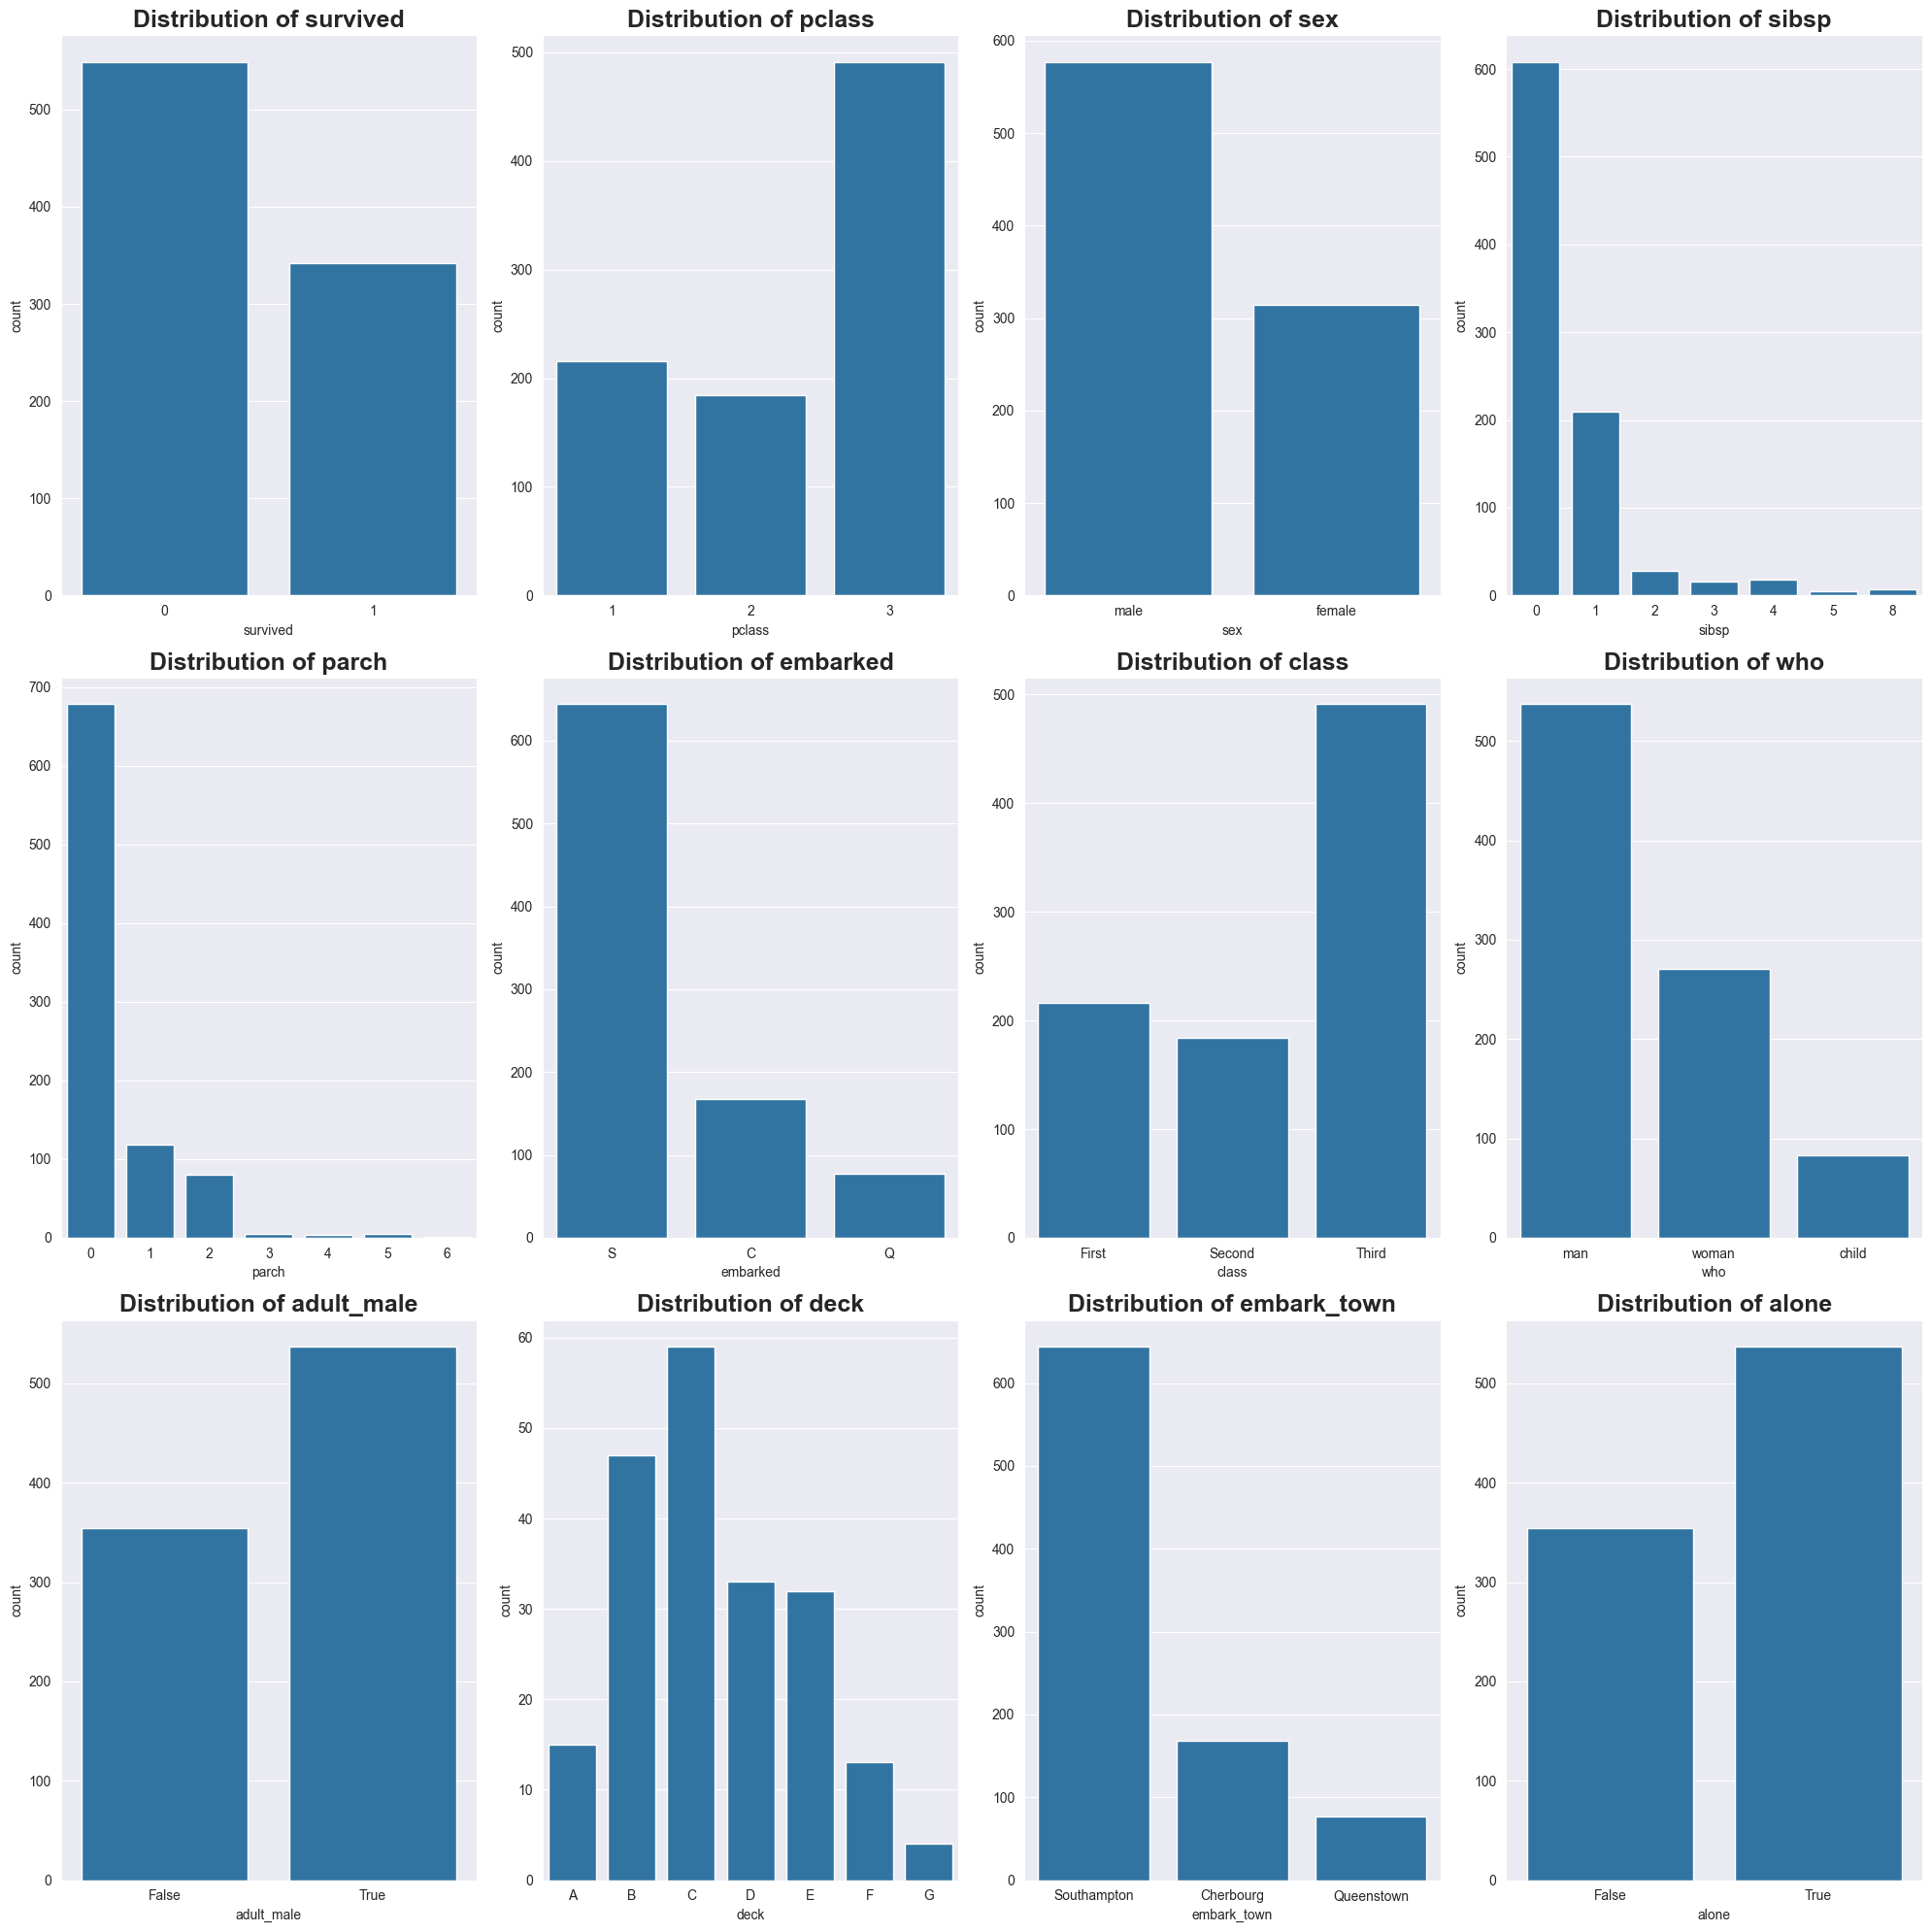

In [10]:
# Visualize the distribution
# Create a figure and subplots based on the number of columns

fig, axs = plt.subplots(3, 4, figsize=(20, 20))
columns = ['survived', 'pclass', 'sex', 'sibsp', 'parch', 'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town', 'alone']

for i, col in enumerate(columns):
    ax = axs[i//4, i%4]
    sns.countplot(x=col, ax=ax, data=data)
    ax.set_title(f"Distribution of {col}", size=18, weight="bold")

plt.tight_layout()
plt.show()

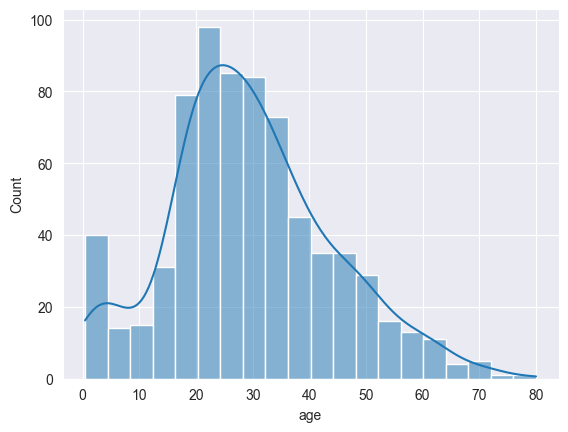

In [14]:
sns.histplot(x="age" , data= data, kde=True)
plt.show()

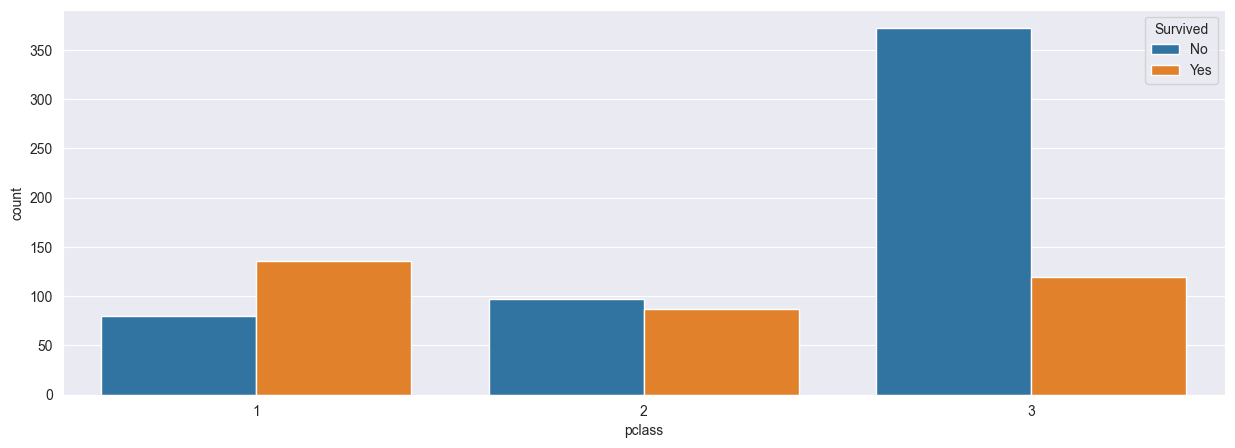

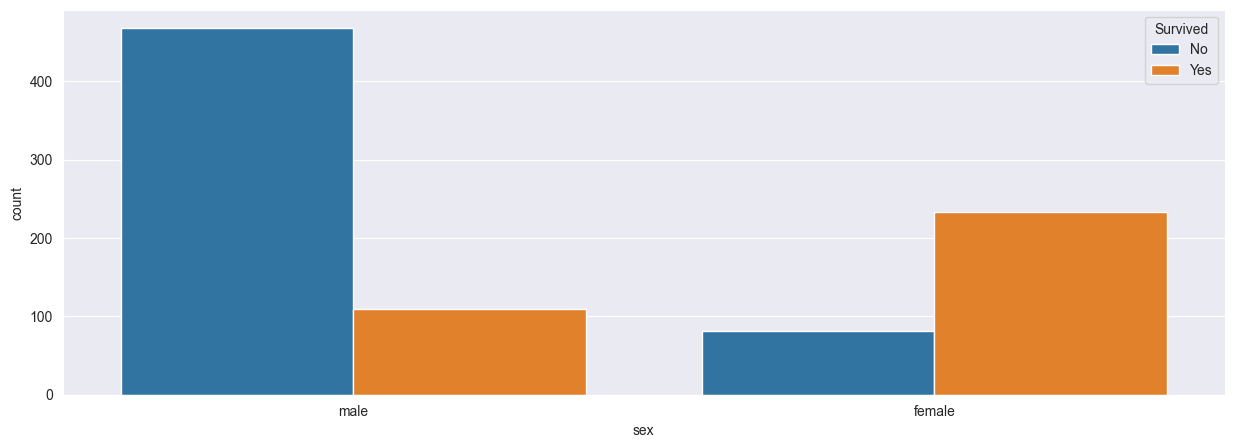

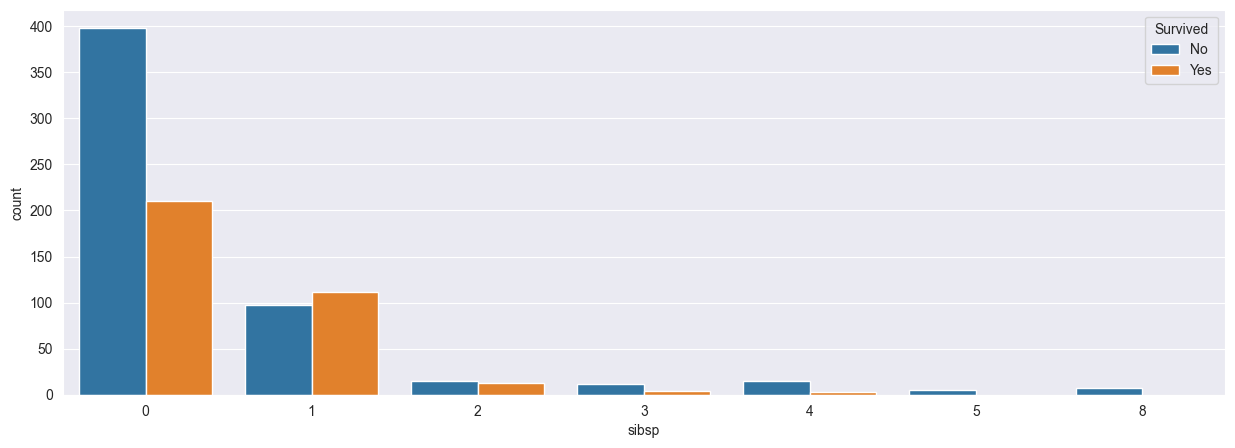

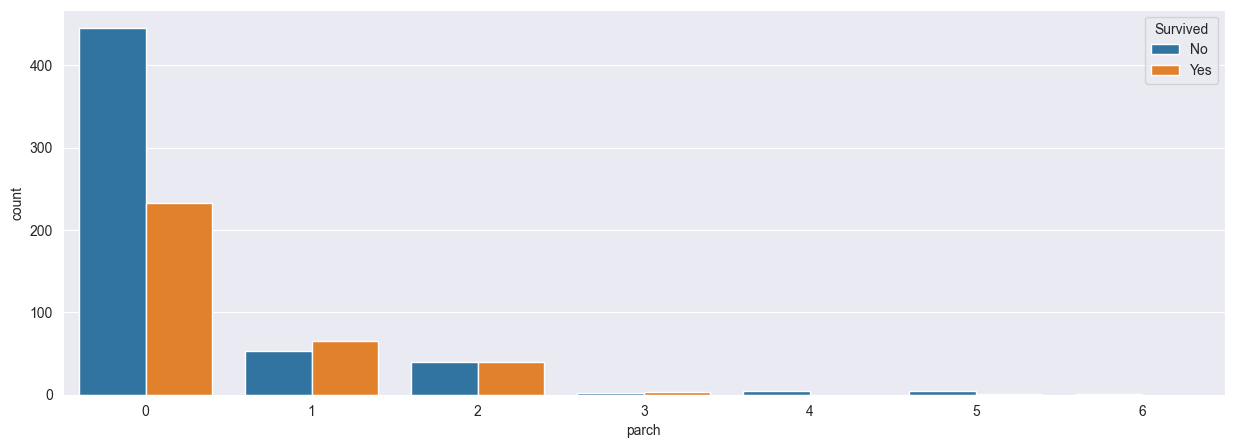

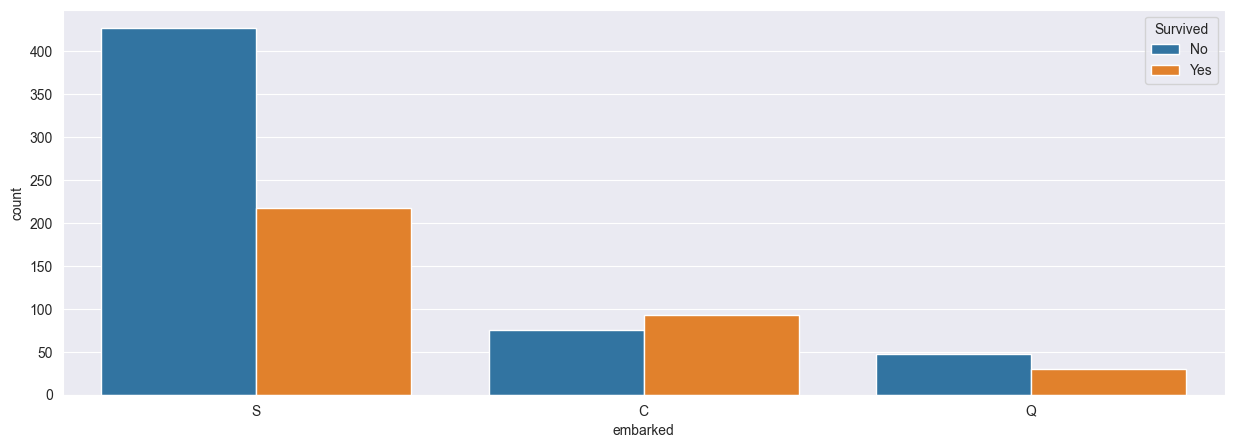

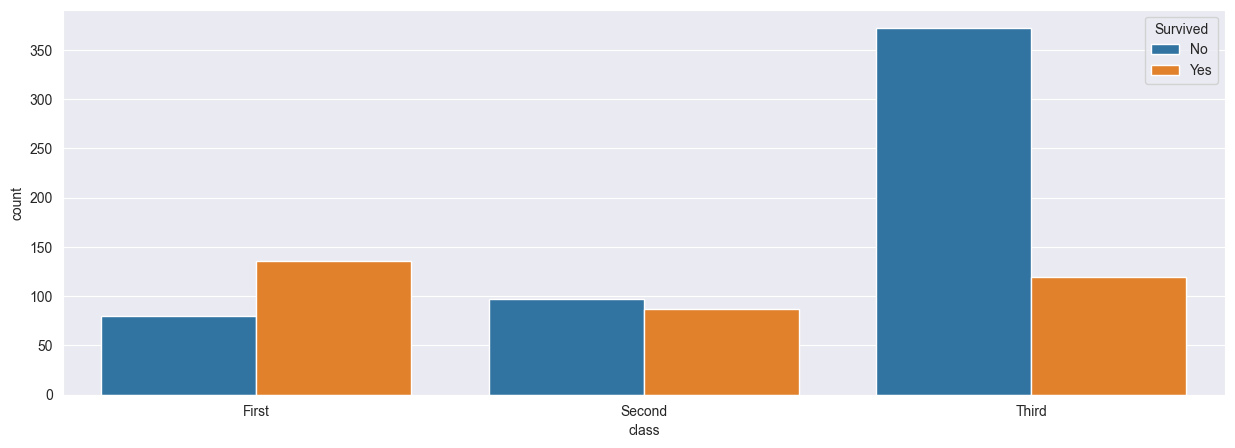

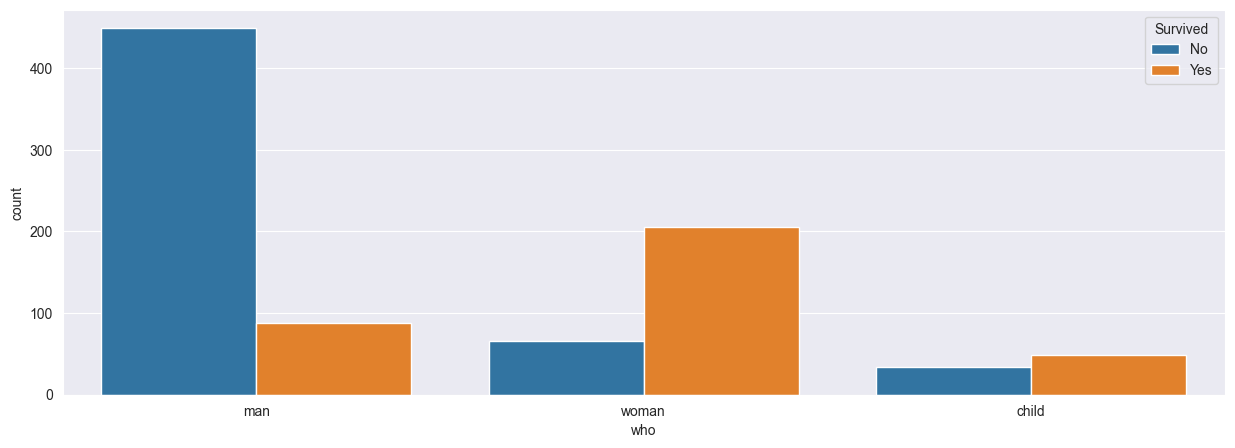

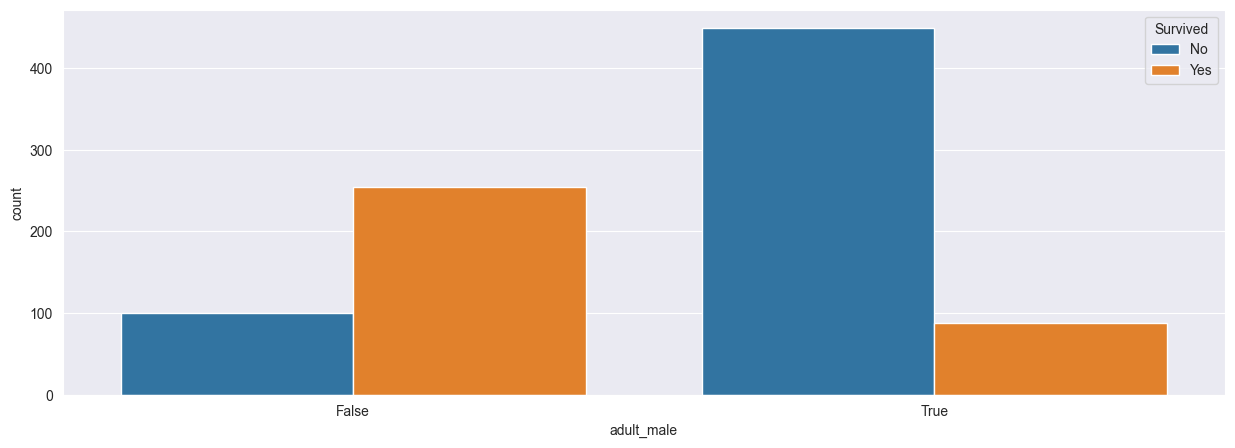

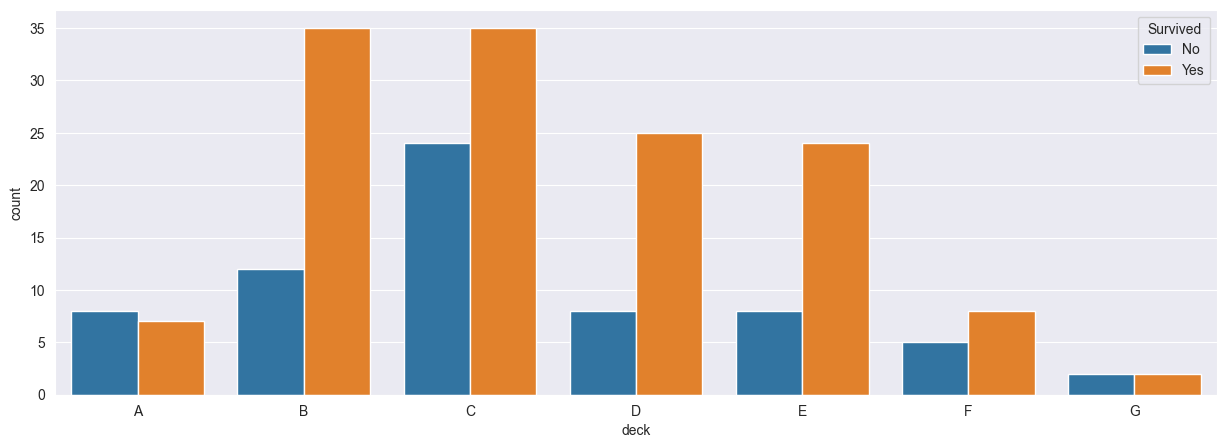

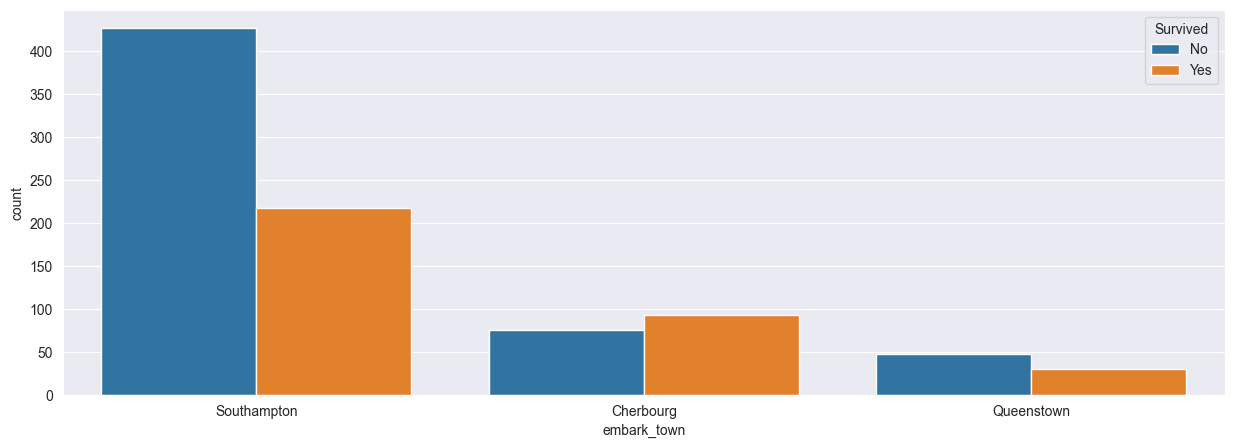

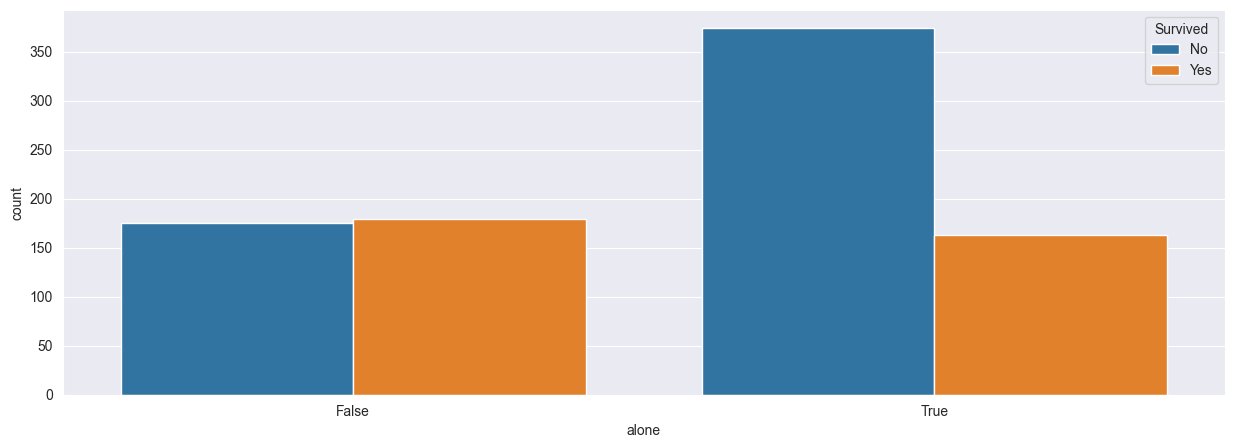

In [12]:
columns = ['pclass', 'sex', 'sibsp', 'parch', 'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town', 'alone']
for feature in columns:
    plt.figure(figsize=(15, 5))
    sns.countplot(x=feature, data=data, hue='survived')
    plt.legend(title="Survived", labels=['No', 'Yes'])
    plt.show()

Continuous Variables

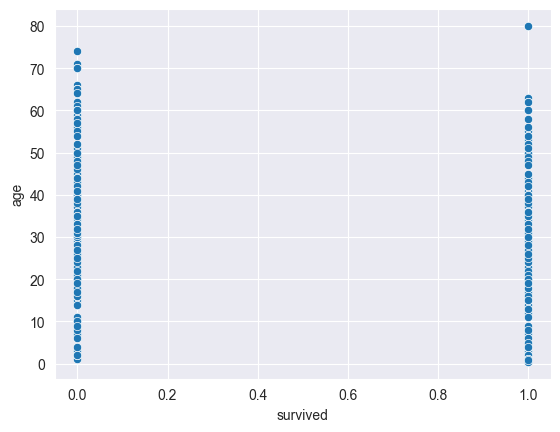

In [15]:
sns.scatterplot(data, x='survived', y='age')
plt.show()

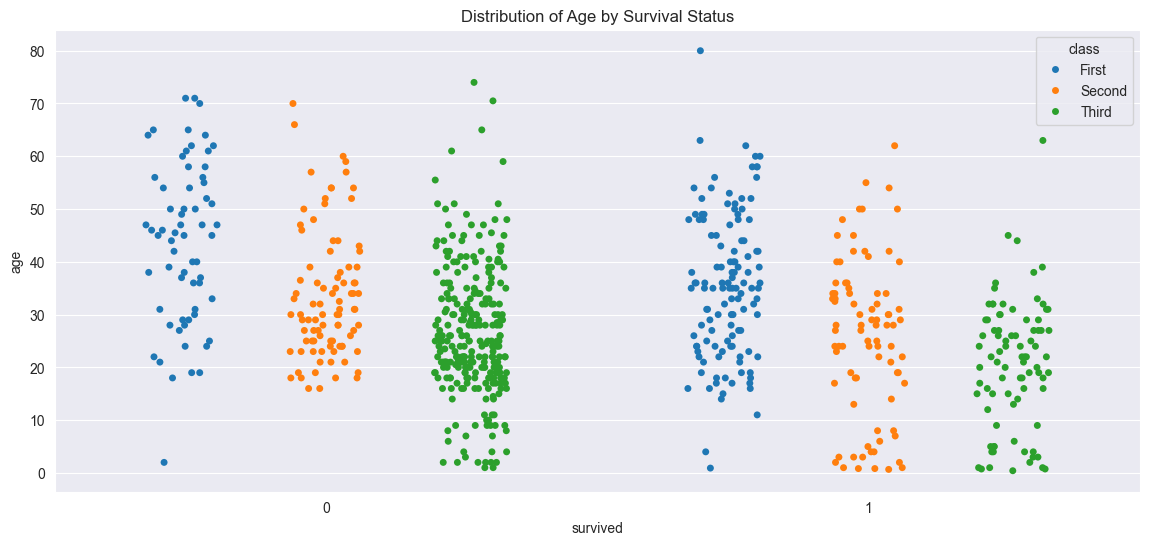

In [22]:
plt.figure(figsize=(14, 6))
sns.stripplot(x="survived", y="age", data=data, jitter=0.2, hue= 'class', dodge=True)
plt.title("Distribution of Age by Survival Status")
plt.show()

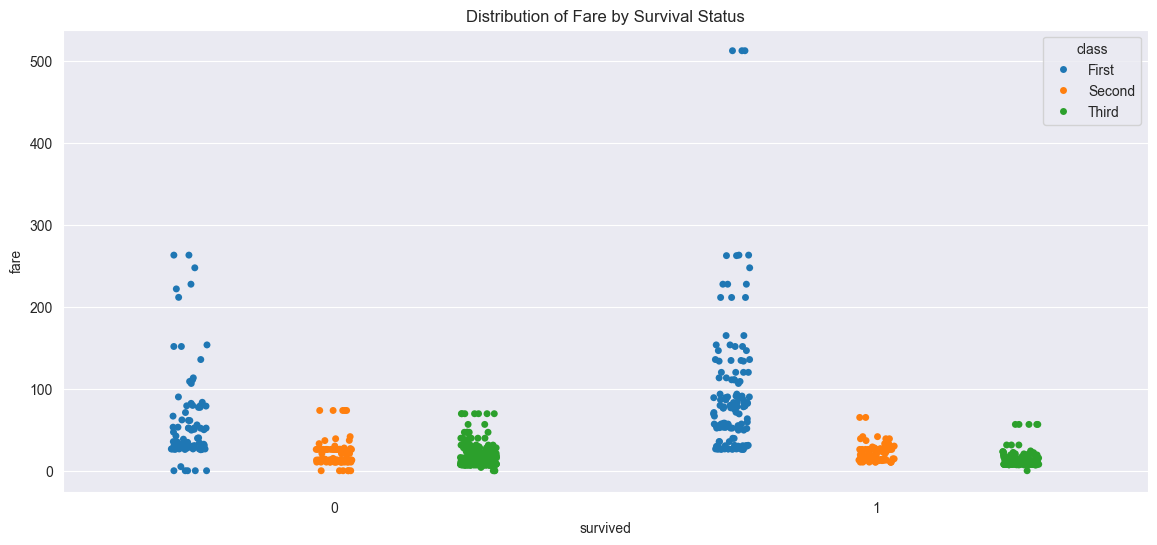

In [26]:
plt.figure(figsize=(14, 6))
sns.stripplot(x="survived", y="fare", data=data, jitter=0.1, dodge=True, hue='class')
plt.title("Distribution of Fare by Survival Status")
plt.show()

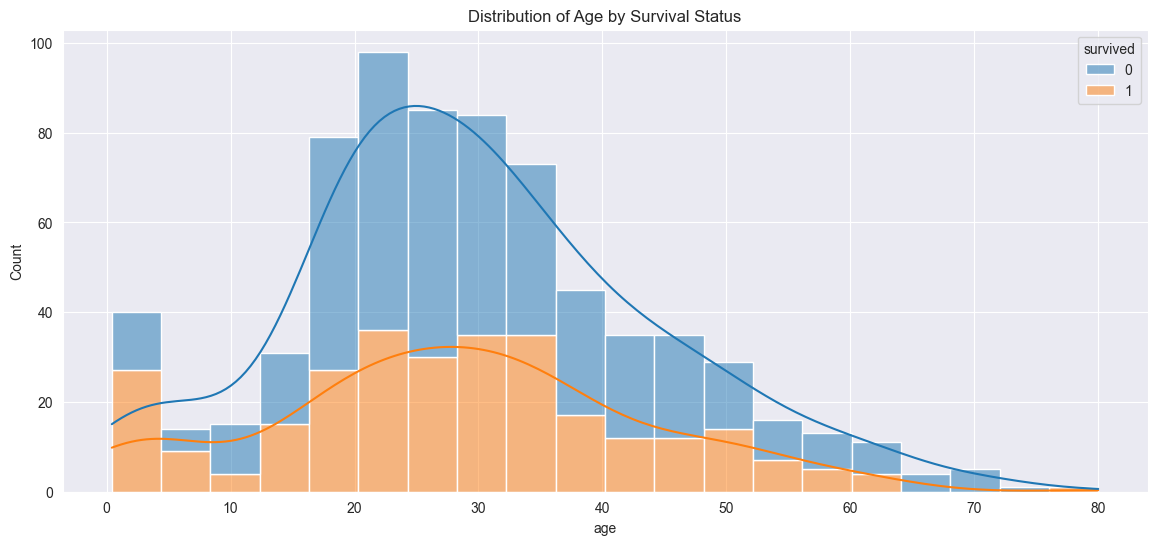

In [27]:
plt.figure(figsize=(14, 6))
sns.histplot(data=data, x='age', hue='survived', multiple='stack', kde=True)# stack
plt.title("Distribution of Age by Survival Status")
plt.show()

# **1️⃣ Data Cleaning**

## **1. Handling missing value**

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [57]:
data.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [ ]:
Columns_with_missing = ['age' , 'embarked' , 'deck' , 'embark_town']

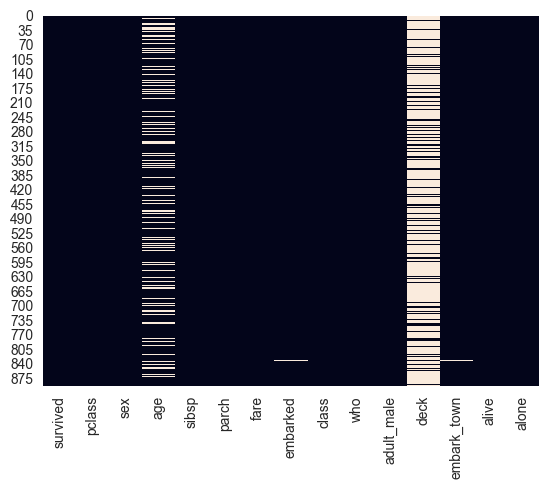

In [30]:
sns.heatmap(data.isnull(), cbar=False)
plt.show()

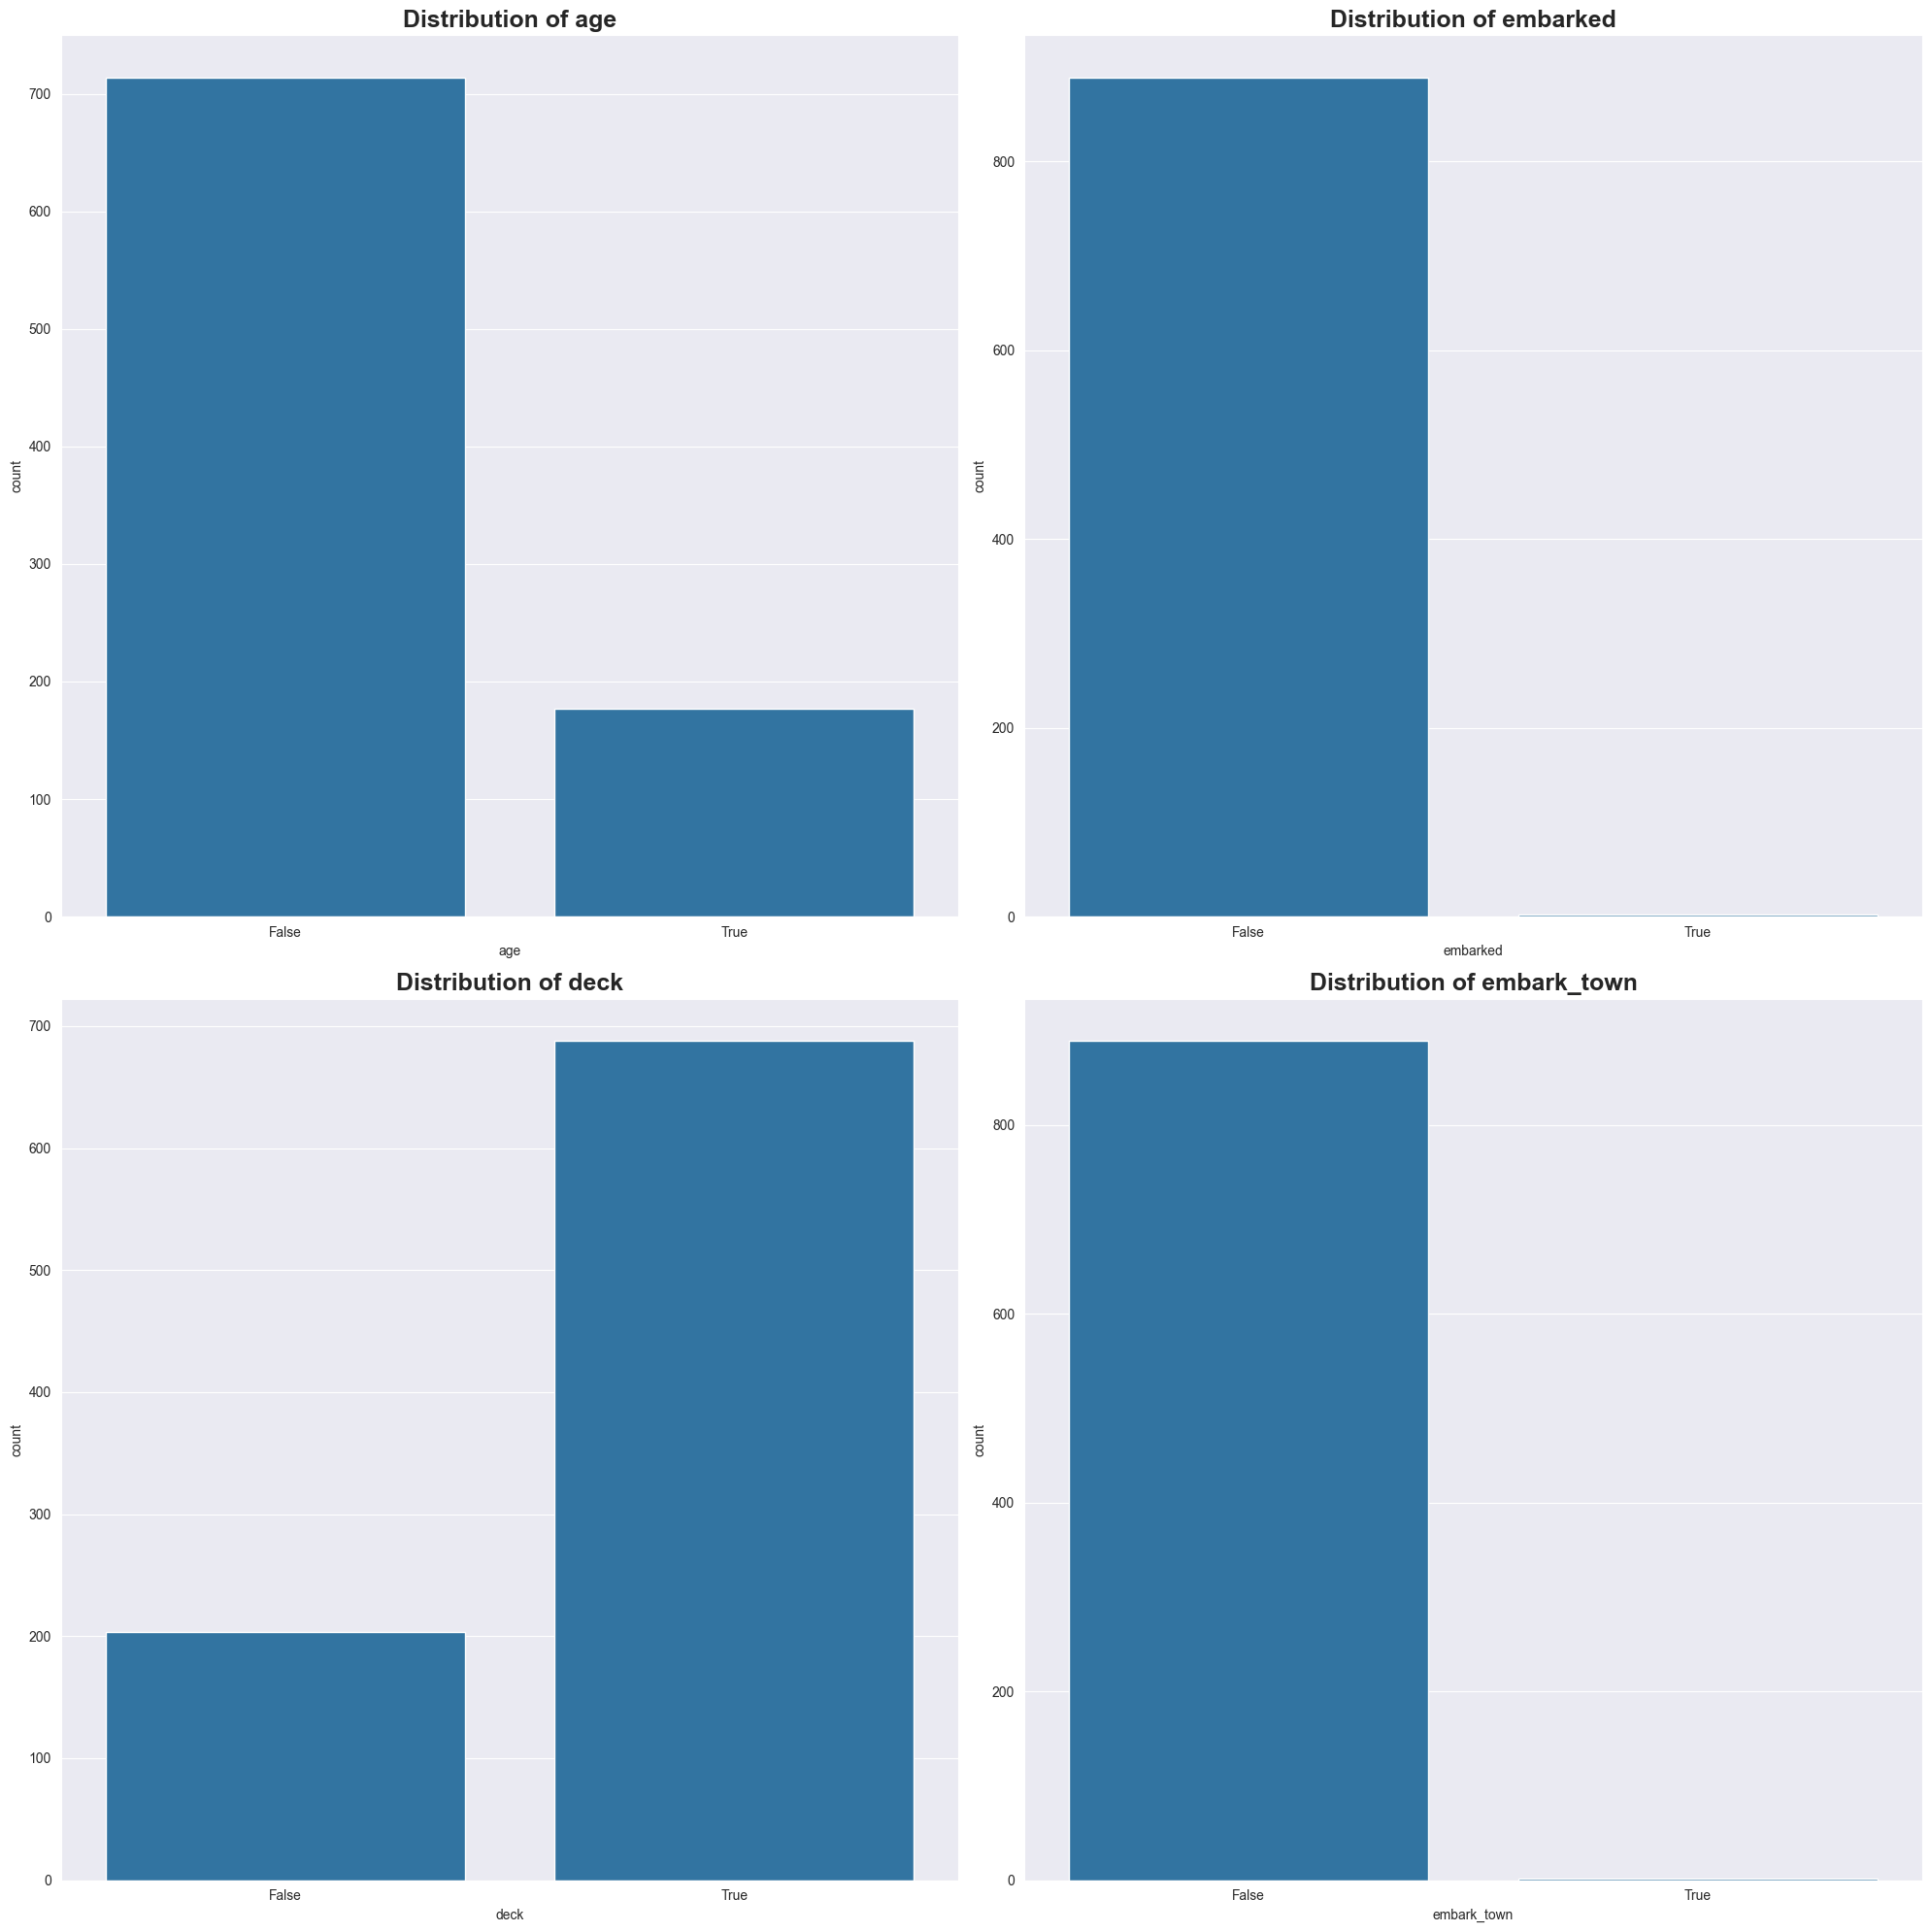

In [63]:
fig, axs = plt.subplots(2, 2, figsize=(20, 20))
Columns_with_missing = ['age' , 'embarked' , 'deck' , 'embark_town']

for i, col in enumerate(Columns_with_missing):
    ax = axs[i//2, i%2]
    sns.countplot(x=data[col].isnull(), ax=ax )
    ax.set_title(f"Distribution of {col}", size=18, weight="bold")

plt.tight_layout()
plt.show()

In [34]:
data.head()
# survived ==  alive
# pclass == class == deck
# embarked == embark_town
# sex ~= who
# sibsp, parch == alone

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [65]:
data = data.drop(columns=["alive", "class", "embark_town", "adult_male", "sex", "alone"])

In [66]:
data=data.drop(columns=["deck"])

In [67]:
data.head()

,survived,pclass,age,sibsp,parch,fare,embarked,who
0,0,3,22.0,1,0,7.2500,S,man
1,1,1,38.0,1,0,71.2833,C,woman
2,1,3,26.0,0,0,7.9250,S,woman
3,1,1,35.0,1,0,53.1000,S,woman
4,0,3,35.0,0,0,8.0500,S,man


In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  889 non-null    int64  
 1   pclass    889 non-null    int64  
 2   age       712 non-null    float64
 3   sibsp     889 non-null    int64  
 4   parch     889 non-null    int64  
 5   fare      889 non-null    float64
 6   embarked  889 non-null    object 
 7   who       889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 62.5+ KB


In [69]:
data.fillna({'embarked': data['embarked'].mode()[0]}, inplace=True)
data.fillna({"age": data["age"].mean()}, inplace = True)

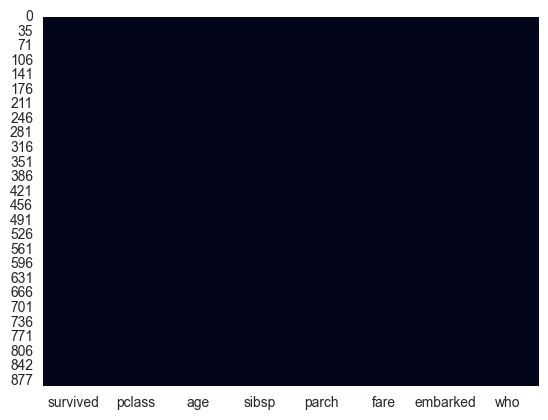

In [70]:
sns.heatmap(data.isnull(), cbar=False)
plt.show()

In [71]:
data.isnull().sum()

survived    0
pclass      0
age         0
sibsp       0
parch       0
fare        0
embarked    0
who         0
dtype: int64

#### threshold other solution

In [72]:
# Find the five percent threshold
threshold = len(data) * 0.05
# Create a filter
cols_to_drop = data.columns[data.isna().sum() <= threshold]
# Drop missing values for columns below the threshold
data.dropna(subset=cols_to_drop, inplace=True)
print(data.isna().sum())

survived    0
pclass      0
age         0
sibsp       0
parch       0
fare        0
embarked    0
who         0
dtype: int64


## **1.2 Dealing with Duplicates**

In [43]:
print("the sum of duplications ")
print(data.duplicated().sum())

the sum of duplications 
112


In [44]:
# Removing Duplicates
data.drop_duplicates(inplace = True)

In [45]:
print("the sum of duplications ")
print(data.duplicated().sum())

the sum of duplications 
0


In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 779 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  779 non-null    int64  
 1   pclass    779 non-null    int64  
 2   age       779 non-null    float64
 3   sibsp     779 non-null    int64  
 4   parch     779 non-null    int64  
 5   fare      779 non-null    float64
 6   embarked  779 non-null    object 
 7   who       779 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 54.8+ KB


## **1.3 Dealing with Outliers**

<Axes: >

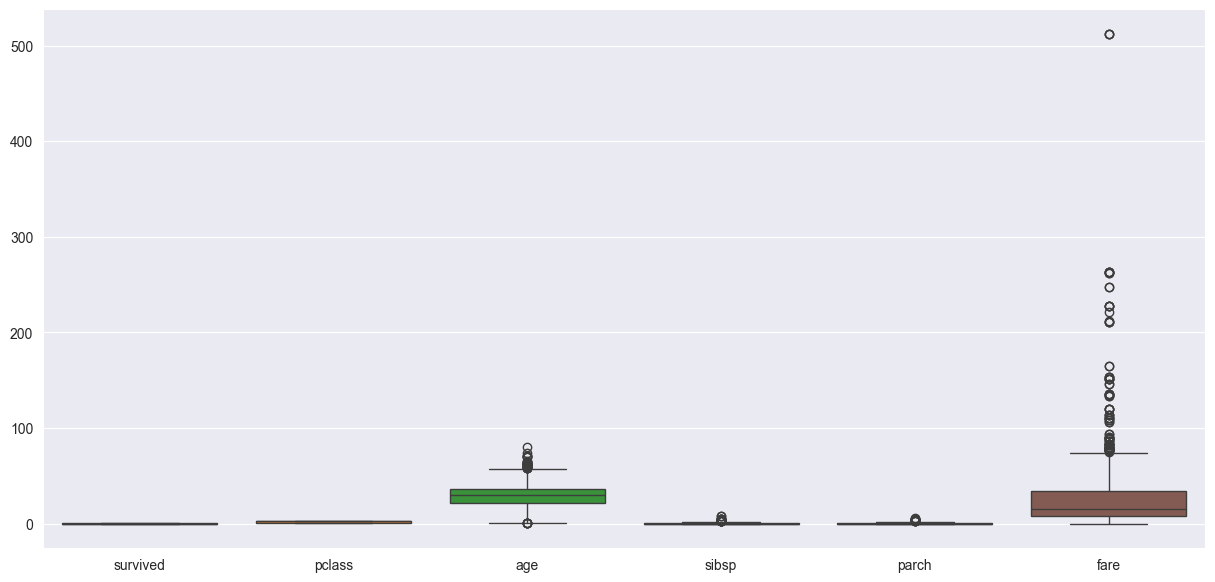

In [48]:
f,ax=plt.subplots(figsize=(15,7))
sns.boxplot(data)

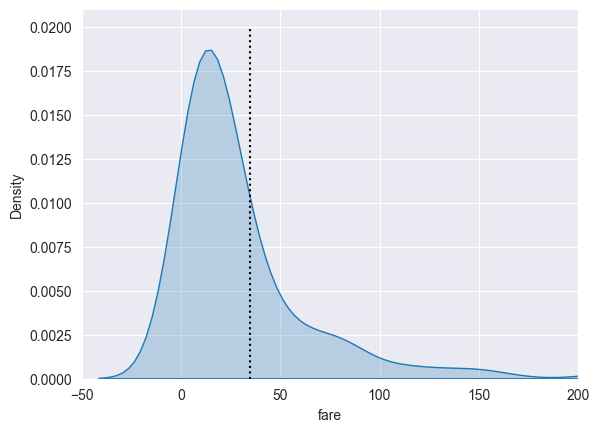

In [49]:
sns.kdeplot(x=data['fare'], fill=True)

# Mean Line
plt.vlines(data['fare'].mean(), 0, 0.02, linestyles= 'dotted', colors='black')

plt.xlim(-50, 200)
plt.show()